In [1]:
import matplotlib.pyplot as plt

from image_io import *
from image_math import *
from image_frequencies import *

Text(0.5, 1.0, "<class 'torch.Tensor'>")

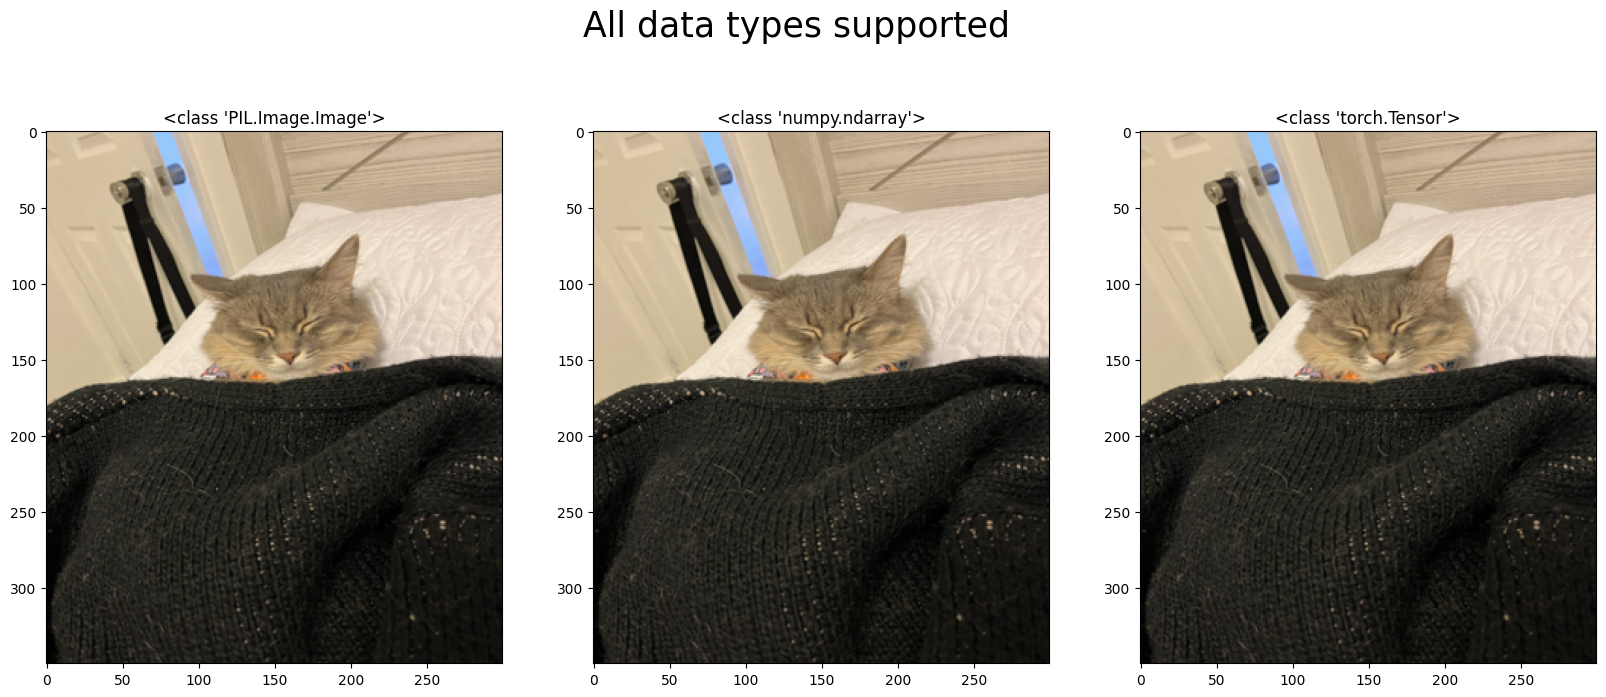

In [2]:
samples = [
    read_image(
        file_name="sleepy_tofu.jpg",
        directory_path="functional/samples/in",
        data_format="pil",
        out_size=(300, 350),
        grayscale=False,
    ),
    read_image(
        file_name="sleepy_tofu.jpg",
        directory_path="functional/samples/in",
        data_format="numpy",
        out_size=(300, 350),
        grayscale=False,
    ),
    read_image(
        file_name="sleepy_tofu.jpg",
        directory_path="functional/samples/in",
        data_format="tensor",
        out_size=(300, 350),
        grayscale=False,
    ),
]

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("All data types supported", fontsize=25)

ax[0].imshow(samples[0])
ax[0].set_title(type(samples[0]))

ax[1].imshow(samples[1])
ax[1].set_title(type(samples[1]))

ax[2].imshow(samples[2].permute(1, 2, 0))
ax[2].set_title(type(samples[2]))

/Users/naycal/Projects/BigPixels/functional/image_frequencies.py:245: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1009.)
  return normalize_image(conv2d(image, kernel, padding="same").view(original_shape))


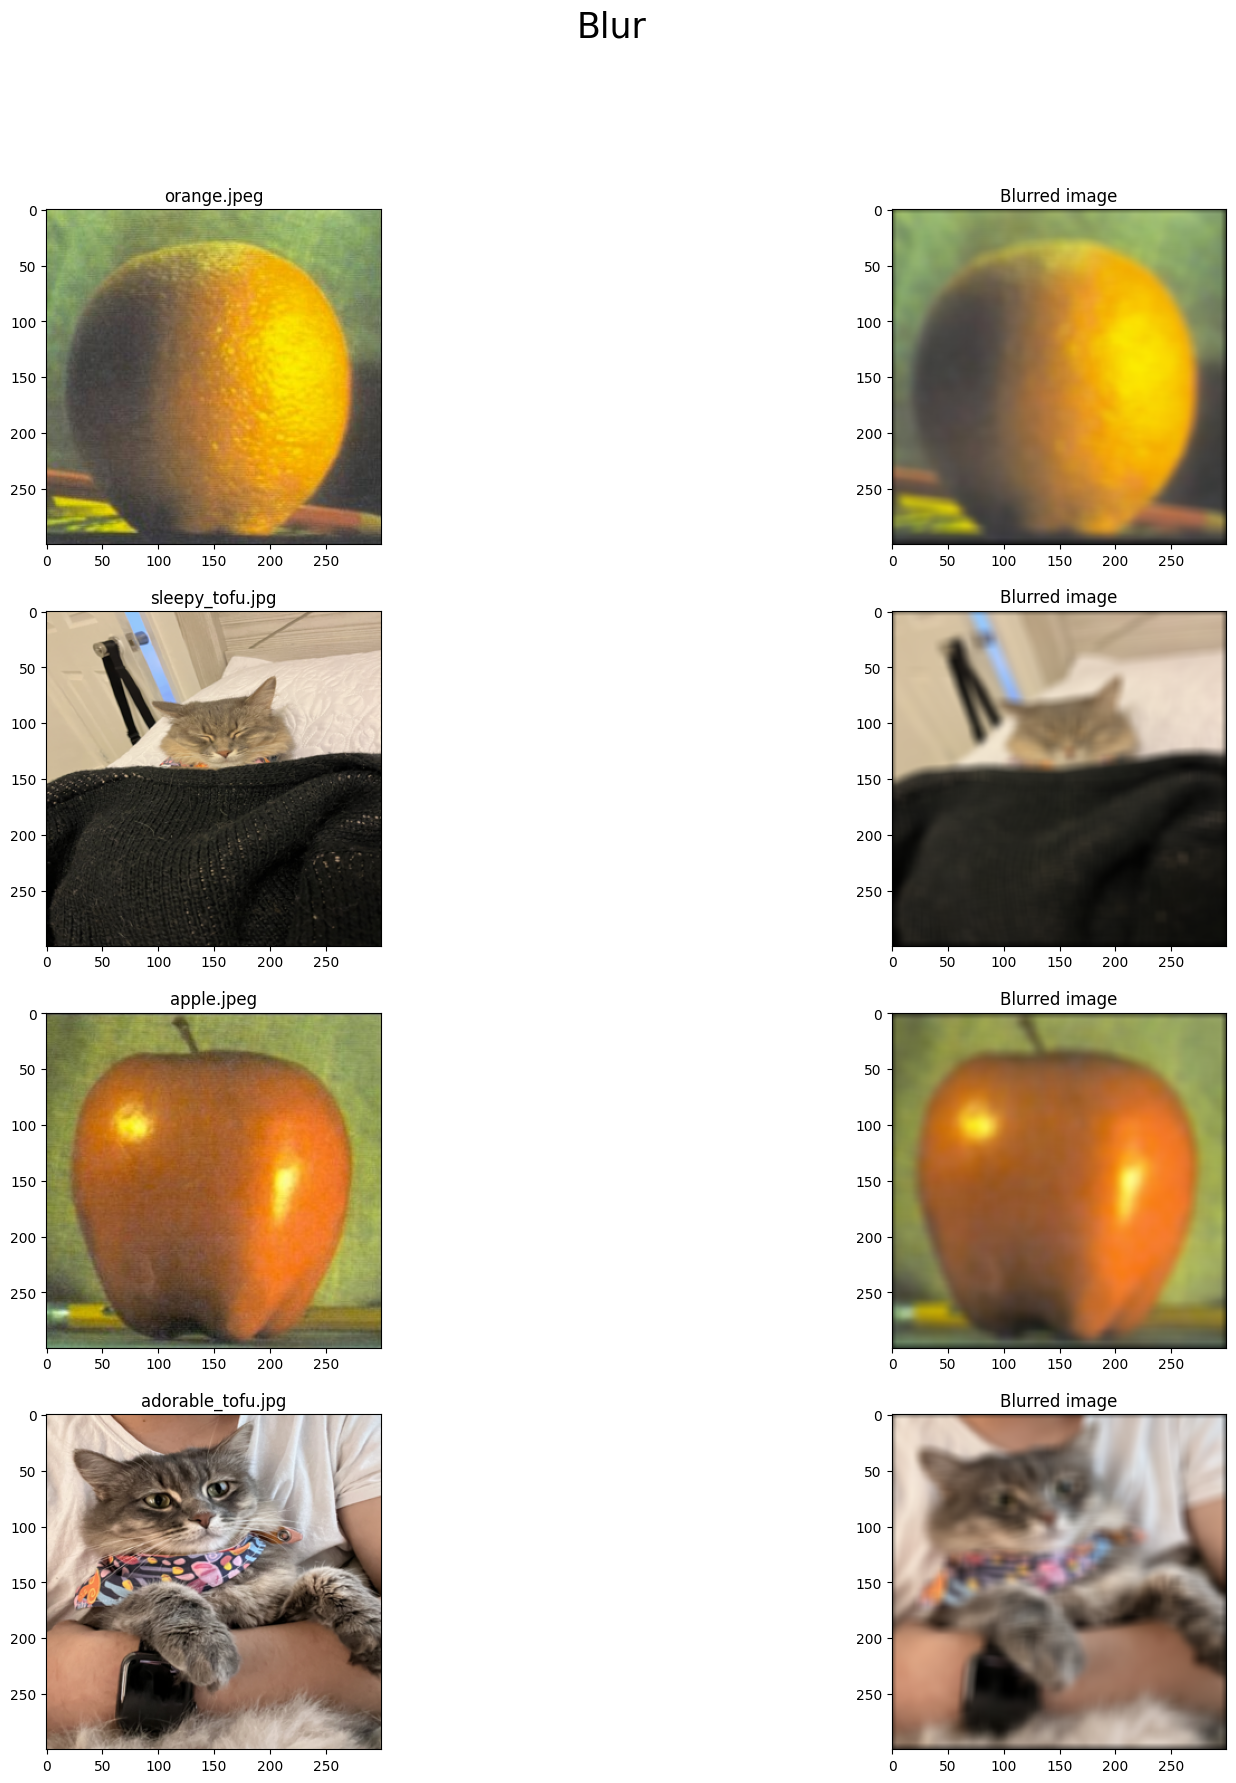

In [3]:
samples, samples_names = read_all_images(
    "functional/samples/in", "torch", out_size=(300, 300), grayscale=False
)
blurred_samples = image_blurr(samples, ksize=10, ksigma=10, device="mps").cpu()

fig, ax = plt.subplots(len(samples), 2, figsize=(20, 20))
fig.suptitle("Blur", fontsize=25)

for i, data in enumerate(zip(samples_names, samples, blurred_samples)):
    name, sample, result = data
    ax[i, 0].imshow(sample.permute(1, 2, 0))
    ax[i, 0].set_title(name)

    ax[i, 1].imshow(result.permute(1, 2, 0))
    ax[i, 1].set_title("Blurred image")
    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


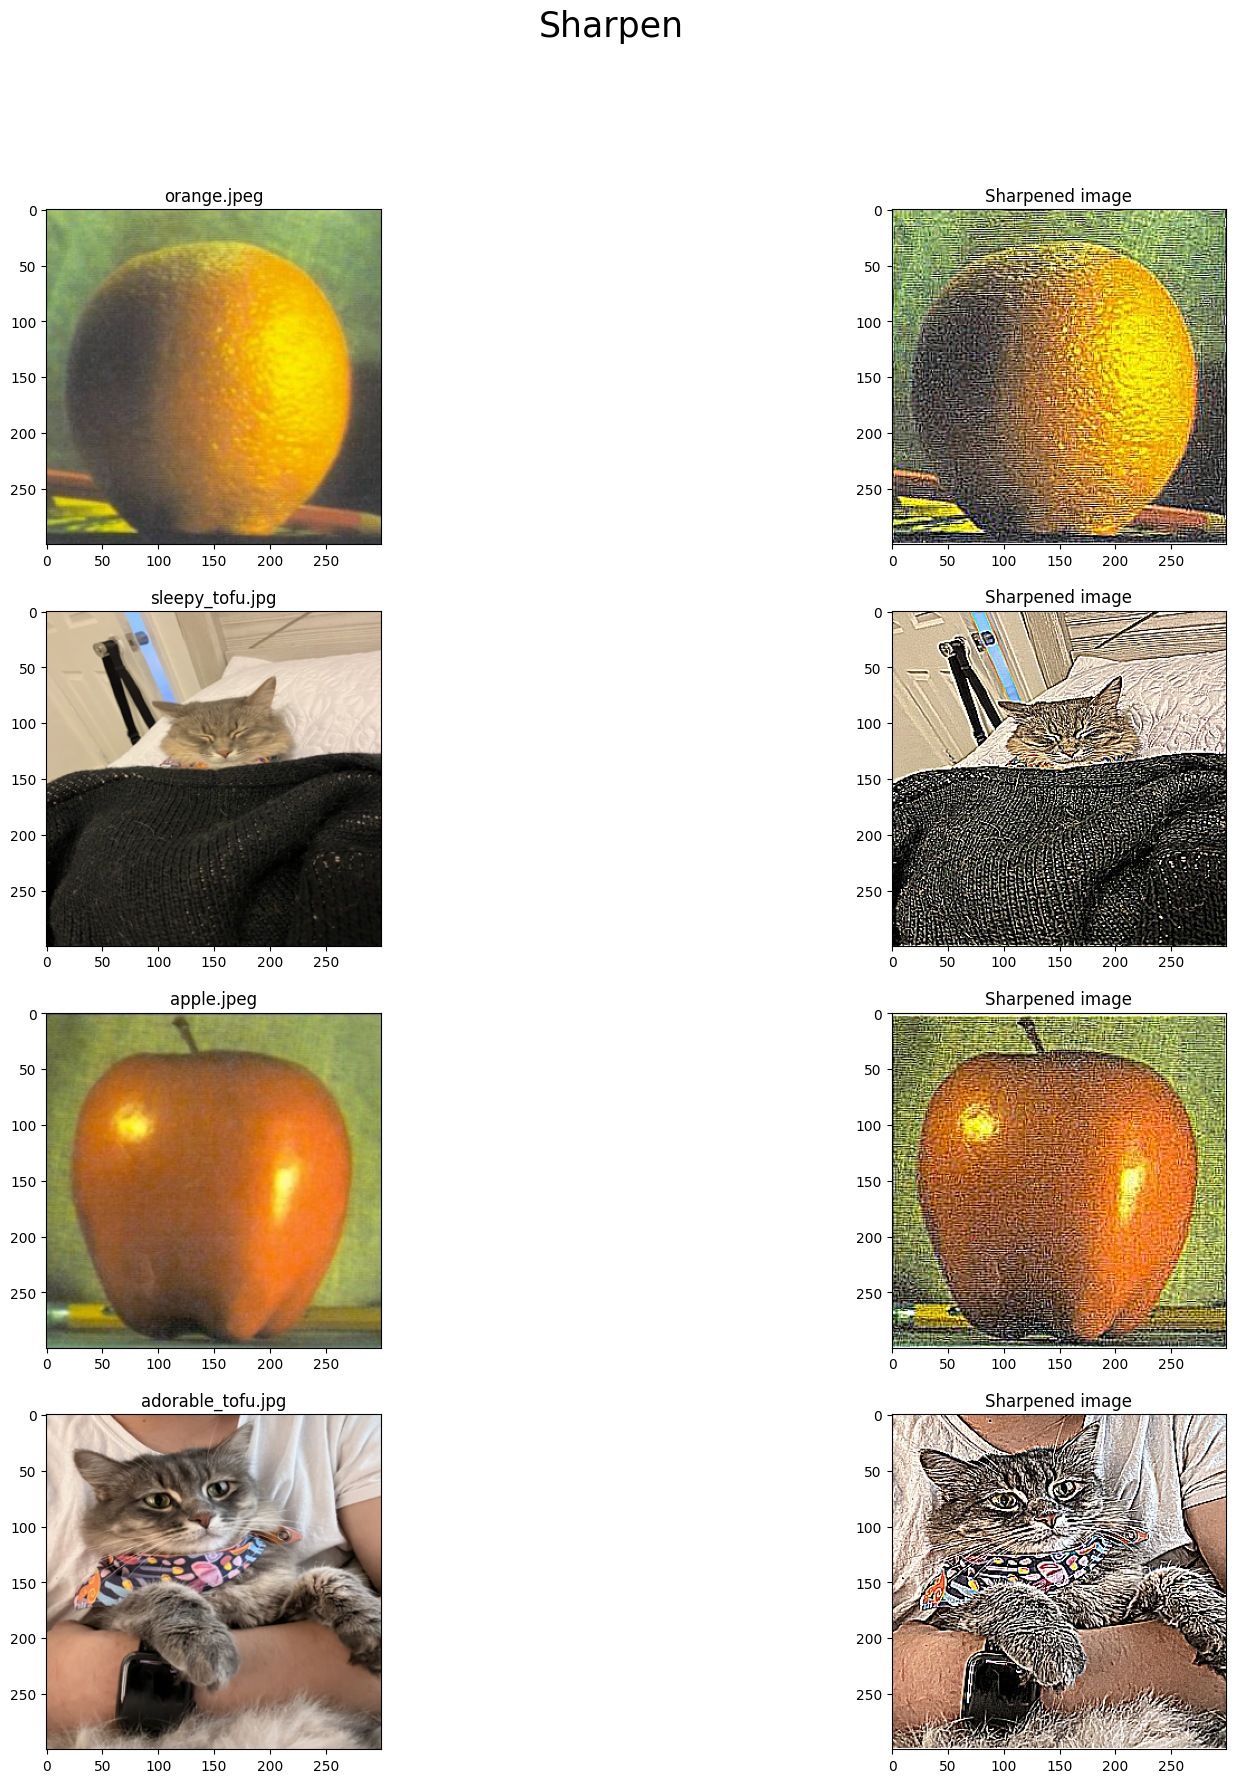

In [4]:
samples, sample_names = read_all_images(
    "functional/samples/in", "torch", out_size=(300, 300), grayscale=False
)
sharpened_samples3 = image_sharpen(samples, alpha=20, ksize=3, ksigma=2, device="mps").cpu()

fig, ax = plt.subplots(len(samples), 2, figsize=(20, 20))
fig.suptitle("Sharpen", fontsize=25)

for i, data in enumerate(zip(sample_names, samples, sharpened_samples3)):
    name, sample, result = data
    ax[i, 0].imshow(sample.permute(1, 2, 0))
    ax[i, 0].set_title(name)

    ax[i, 1].imshow(result.permute(1, 2, 0))
    ax[i, 1].set_title("Sharpened image")
    
plt.show()

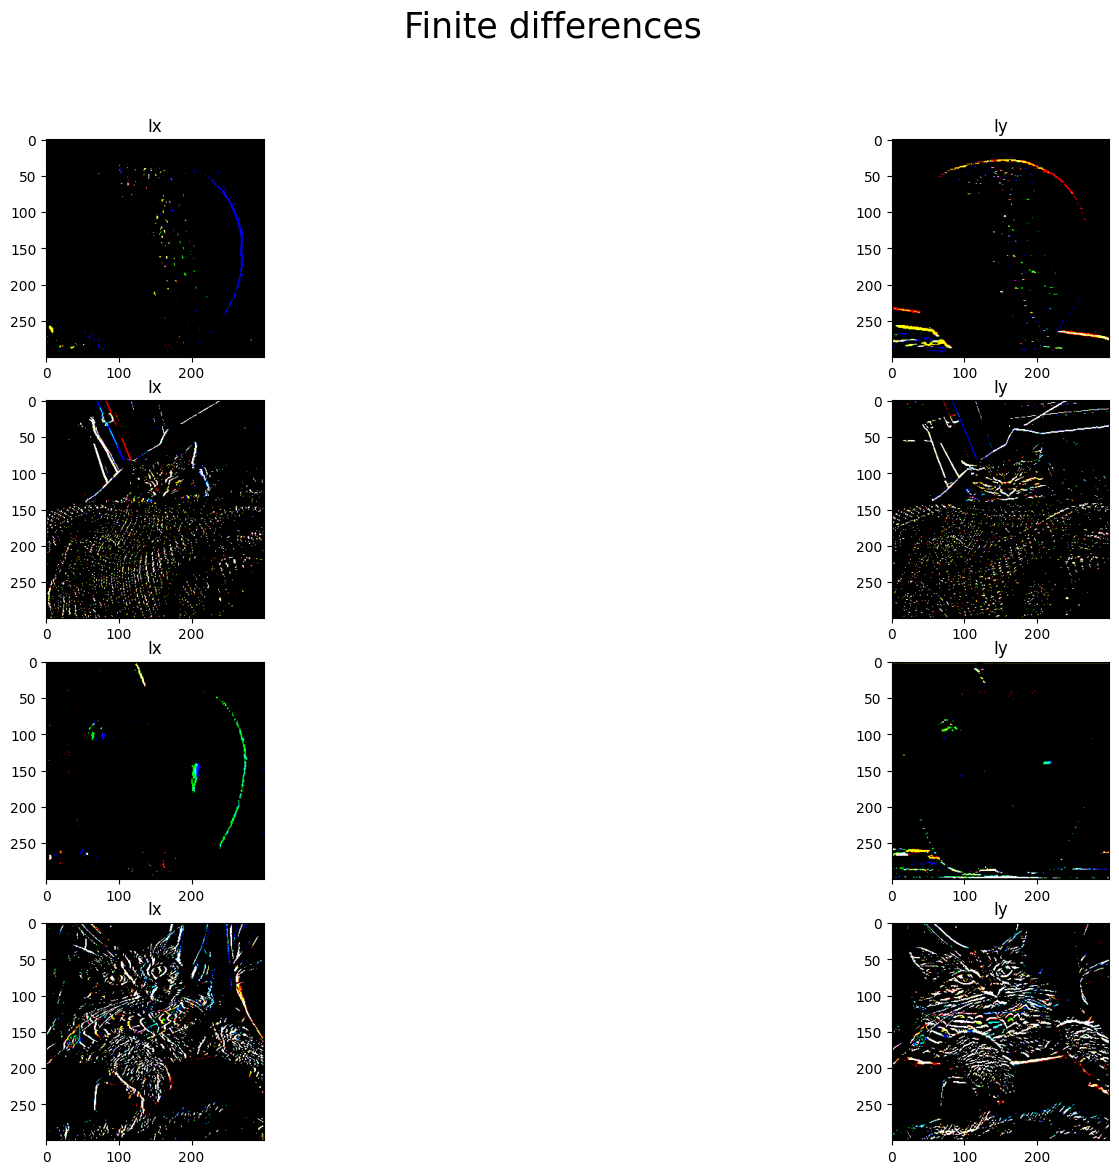

In [5]:
samples, sample_names = read_all_images(
    "functional/samples/in", "numpy", out_size=(300, 300), grayscale=False
)

samples_dx, samples_dy = finite_difference(
    samples, reduce_noise=False, out_grayscale=False, binary_threshold=0.08, device="mps"
)

fig, ax = plt.subplots(samples_dx.shape[0], 2, figsize=(20, 13))
fig.suptitle("Finite differences", fontsize=25)

for i, data in enumerate(zip(samples_dx, samples_dy)):
    sxx, syy = data
    ax[i, 0].imshow(sxx)
    ax[i, 1].imshow(syy)
    
    ax[i, 0].set_title("Ix")
    ax[i, 1].set_title("Iy")

plt.show()

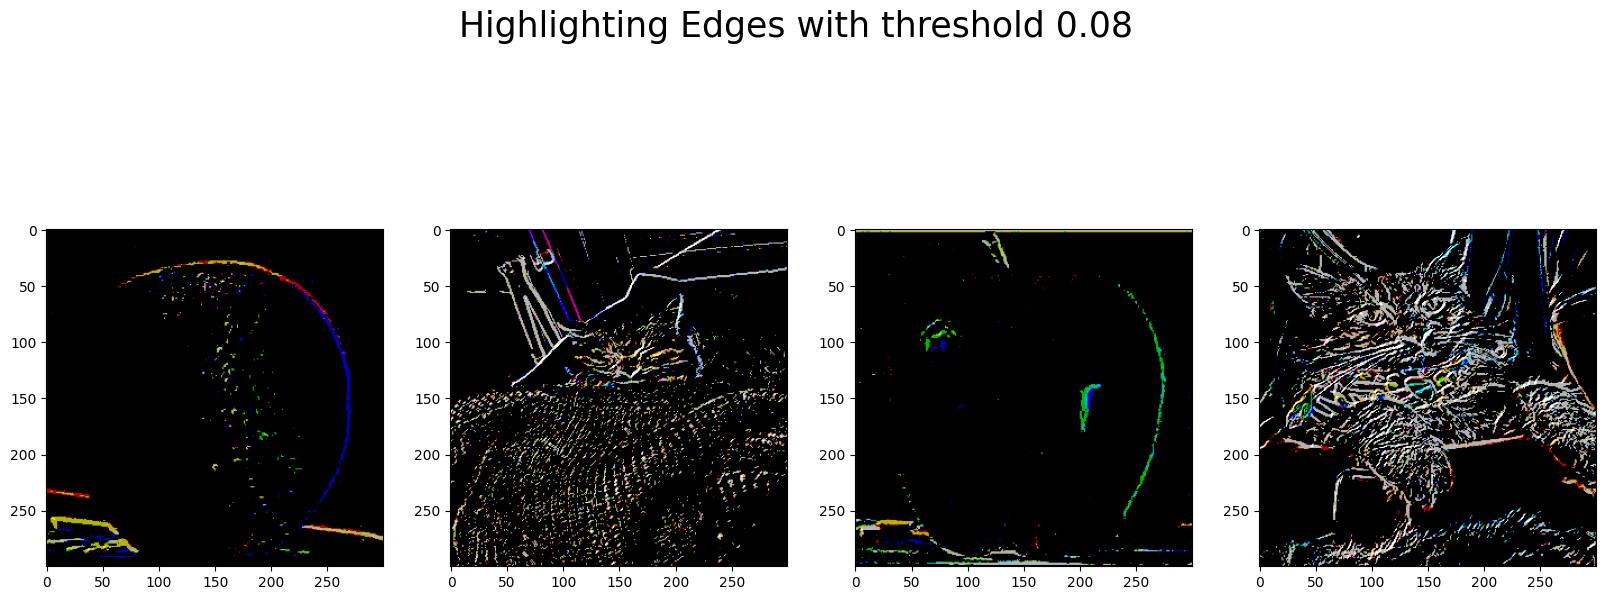

In [8]:
samples, sample_names = read_all_images(
    "functional/samples/in", "torch", out_size=(300, 300), grayscale=False
)

samples_edges = highlight_edges(
    samples, reduce_noise=False, out_grayscale=False, binary_threshold=0.08, device="mps"
).cpu().permute(0, 2, 3, 1)

fig, ax = plt.subplots(1, samples_dx.shape[0], figsize=(20, 8))
fig.suptitle("Highlighting Edges with threshold 0.08", fontsize=25)

for i, s_edges in enumerate(samples_edges):
    ax[i].imshow(s_edges)

plt.show()

100%|██████████| 4/4 [00:01<00:00,  2.64it/s]


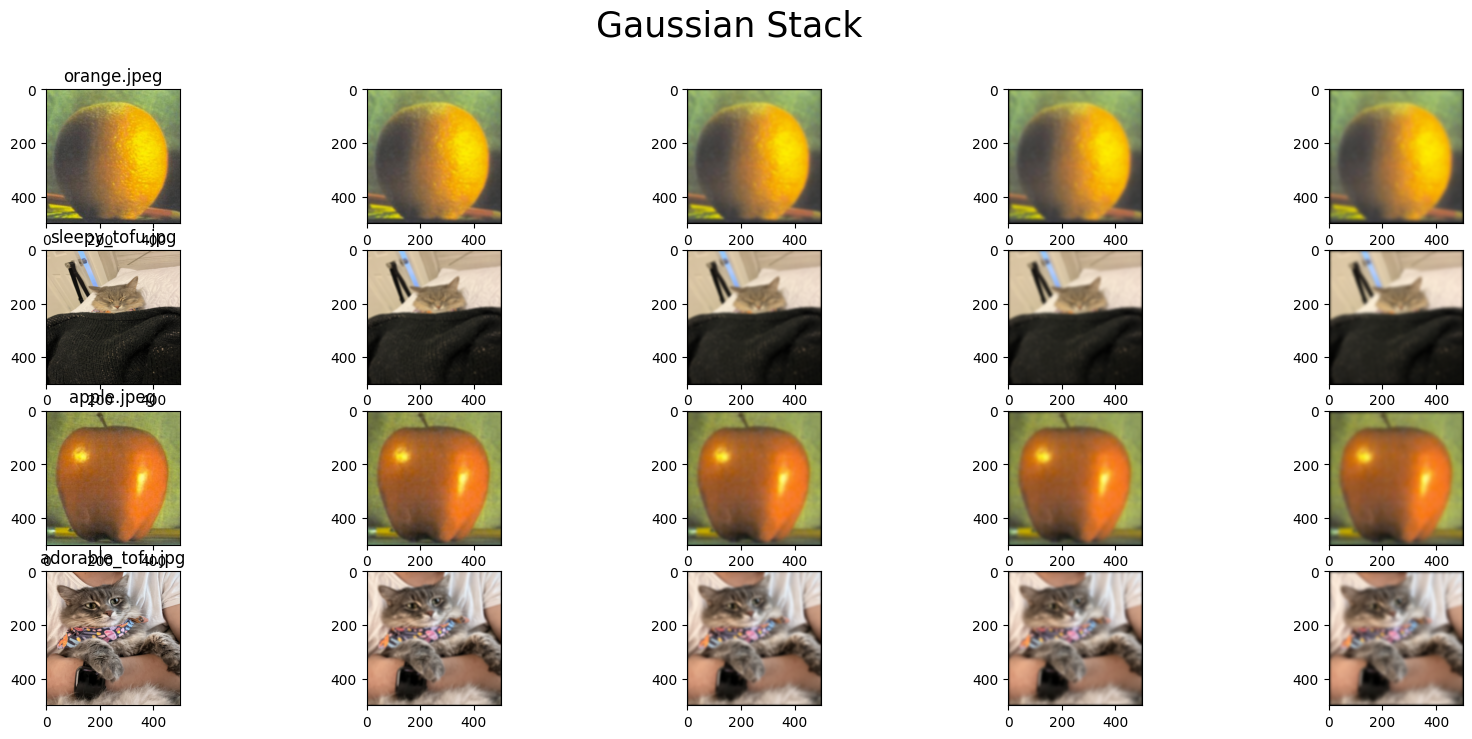

In [ ]:
samples, sample_names = read_all_images(
    "functional/samples/in", "numpy", out_size=(500, 500), grayscale=False
)
gaussian_samples3 = gaussian_stack(samples, depth=5, ksize=10, ksigma=5, device='cpu', is_batch_memory=True)

fig, ax = plt.subplots(gaussian_samples3.shape[0], gaussian_samples3.shape[1], figsize=(20, 8))
fig.suptitle("Gaussian Stack", fontsize=25)

for i, name in enumerate(sample_names):
    ax[i, 0].set_title(name)
    for j, g_sample in enumerate(gaussian_samples3[i]):
        ax[i, j].imshow(g_sample)

plt.show()

100%|██████████| 4/4 [00:00<00:00, 63.83it/s]


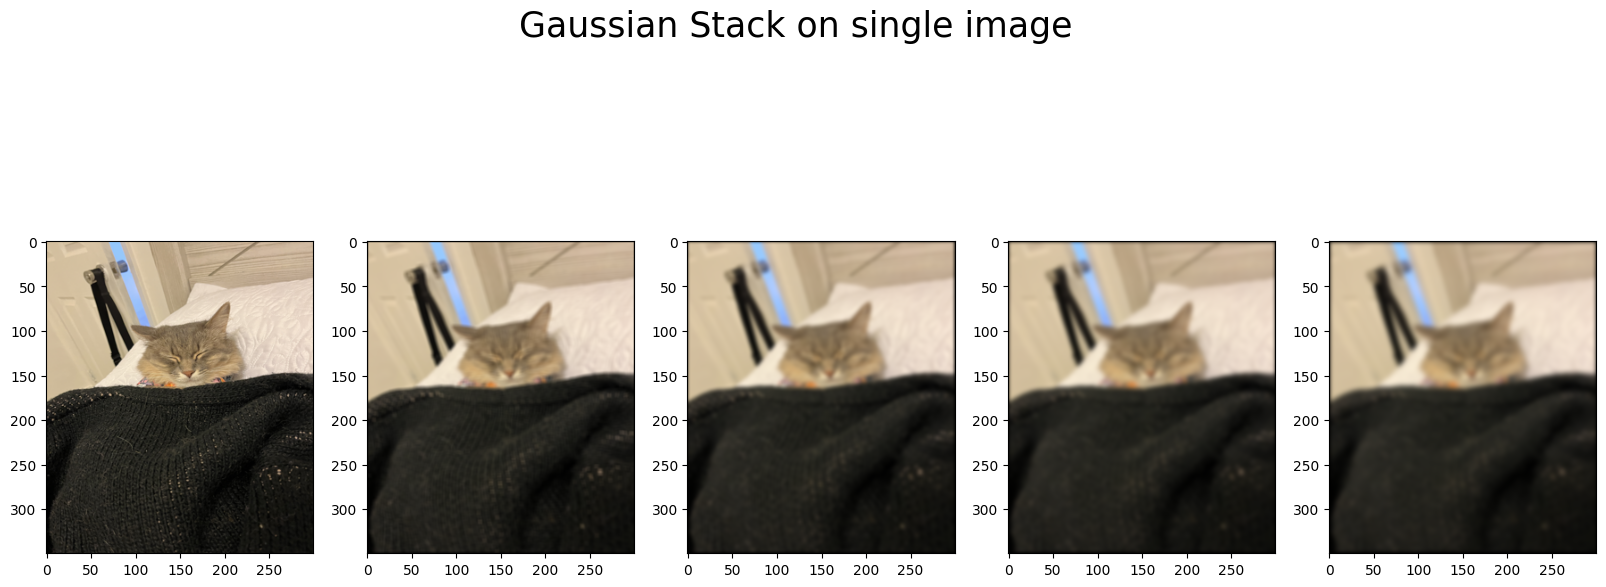

In [ ]:
sample = read_image(file_name="sleepy_tofu.jpg", directory_path="functional/samples/in", data_format="torch", out_size=(300, 350), grayscale=False)
single_gaussian_stack_sample = gaussian_stack(sample, depth=5, ksize=5, ksigma=5, device='mps', is_batch_memory=False)

fig, ax = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle("Gaussian Stack on single image", fontsize=25)

for i, result in enumerate(single_gaussian_stack_sample):
    ax[i].imshow(result.cpu().permute(1, 2, 0))
    
plt.show()

100%|██████████| 4/4 [00:01<00:00,  2.55it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] fo

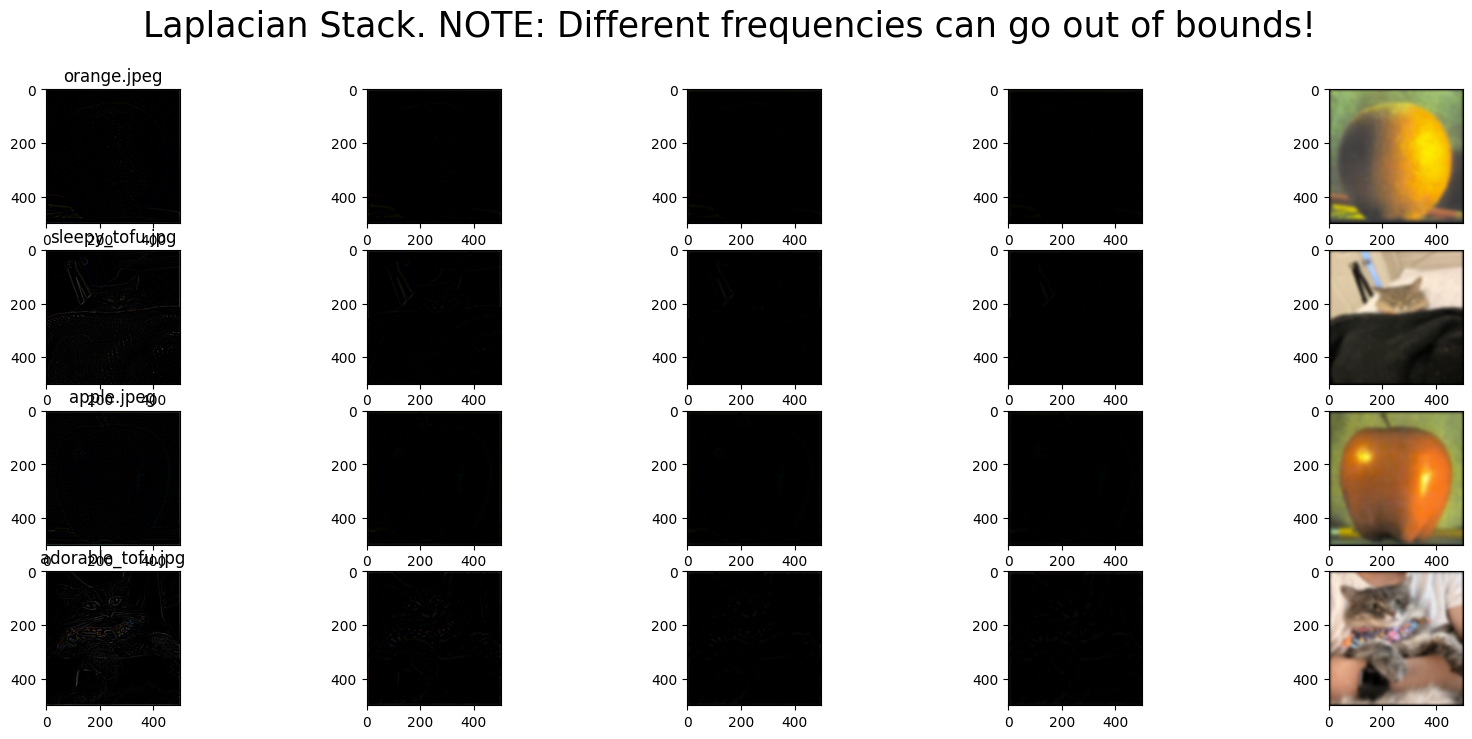

In [ ]:
samples, sample_names = read_all_images(
    "functional/samples/in", "numpy", out_size=(500, 500), grayscale=False
)
laplacian_samples3 = laplacian_stack(samples, depth=5, ksize=10, ksigma=10, device='mps', is_batch_memory=True)

fig, ax = plt.subplots(laplacian_samples3.shape[0], laplacian_samples3.shape[1], figsize=(20, 8))
fig.suptitle("Laplacian Stack. NOTE: Different frequencies can go out of bounds!", fontsize=25)

for i, name in enumerate(sample_names):
    ax[i, 0].set_title(name)
    for j, g_sample in enumerate(laplacian_samples3[i]):
        ax[i, j].imshow(g_sample)

plt.show()

100%|██████████| 4/4 [00:00<00:00, 89.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


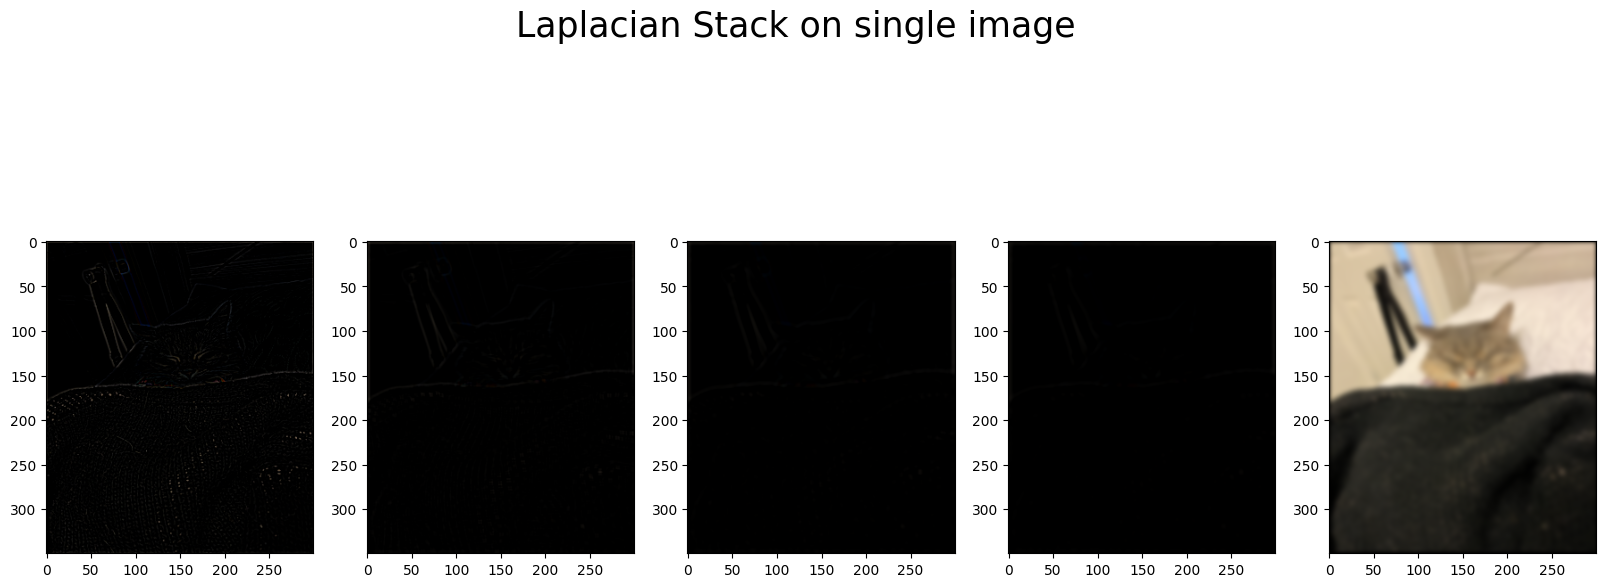

In [ ]:
sample = read_image(file_name="sleepy_tofu.jpg", directory_path="functional/samples/in", data_format="torch", out_size=(300, 350), grayscale=False)
single_laplacian_stack_sample = laplacian_stack(sample, depth=5, ksize=5, ksigma=5, device='mps', is_batch_memory=False).cpu()

fig, ax = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle("Laplacian Stack on single image", fontsize=25)

for i, result in enumerate(single_laplacian_stack_sample):
    ax[i].imshow(result.cpu().permute(1, 2, 0))
    
plt.show()

100%|██████████| 4/4 [00:00<00:00, 158.22it/s]


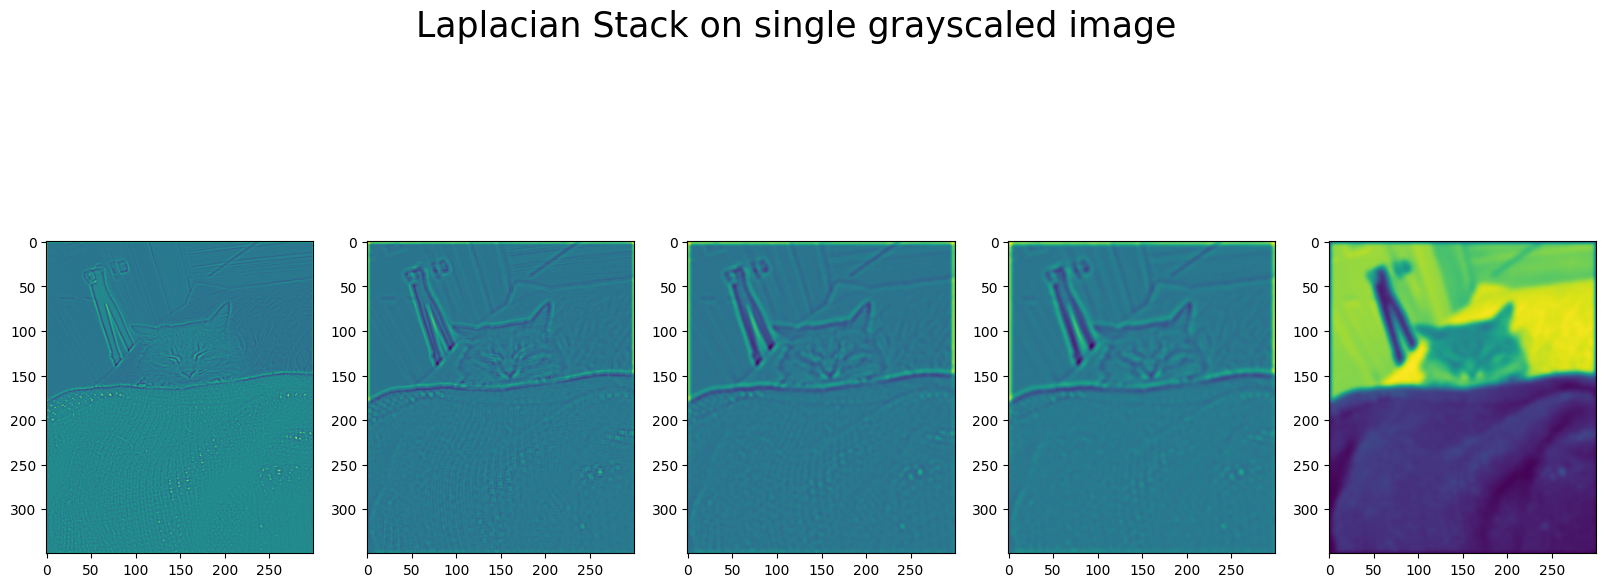

In [ ]:
sample = read_image(file_name="sleepy_tofu.jpg", directory_path="functional/samples/in", data_format="torch", out_size=(300, 350), grayscale=True)
single_laplacian_stack_sample = laplacian_stack(sample, depth=5, ksize=5, ksigma=5, device='mps', is_batch_memory=False).cpu()

fig, ax = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle("Laplacian Stack on single grayscaled image", fontsize=25)

for i, result in enumerate(single_laplacian_stack_sample):
    ax[i].imshow(result.cpu().permute(1, 2, 0))
    
plt.show()

100%|██████████| 99/99 [00:00<00:00, 558.98it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


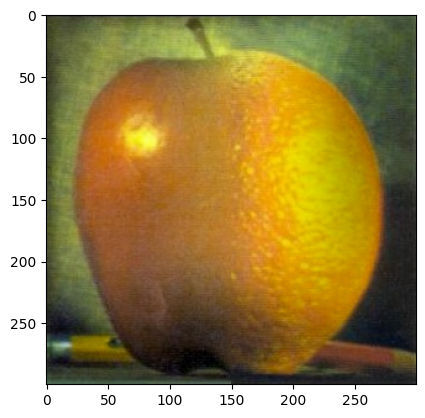

In [ ]:
sapple = read_image(file_name="apple.jpeg", directory_path="functional/samples/in", data_format="torch", out_size=(300, 300), grayscale=False)
sorange = read_image(file_name="orange.jpeg", directory_path="functional/samples/in", data_format="torch", out_size=(300, 300), grayscale=False)

sapple_mask = torch.ones((1, 300, 300))
sapple_mask[:, :, 150:] = 0
sorange_mask = torch.ones((1, 300, 300))
sorange_mask[:, :, :150] = 0

masks = torch.stack((sapple_mask, sorange_mask), dim=0)

orapple = image_blend(torch.stack((sapple, sorange), dim=0), masks, depth=100, ksize=10, ksigma=10, device='mps', is_batch_memory=True)
plt.imshow(orapple.cpu().permute(1, 2, 0))